In [176]:
#Check version of libraries

import matplotlib
from platform import python_version

print('python: {}'.format(python_version()))
print('matplotlib: {}'.format(matplotlib.__version__))

python: 3.8.8
matplotlib: 3.3.4


In [3]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [4]:
#Read the data

df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Portfolio\Python\Dataset\videogames_sales.csv')

In [5]:
pd.set_option('display.max_rows',None)
#pd.set_option('display.max_colwidth', 0)

In [6]:
#Check out the data

df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [7]:
#Drop some columns and change column name to make it make clearer

df = df.drop(columns=['url','status','Vgchartzscore','img_url','Last_Update','Rank'])
df = df.rename(columns={'PAL_Sales': 'EU_Sales'})
df.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
0,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [8]:
#Check type of data of each columns

df.dtypes

Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Other_Sales       float64
Year              float64
dtype: object

In [119]:
#Check if there are columns with missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

Name - 0.0%
basename - 0.0%
Genre - 0.0%
ESRB_Rating - 0.5708499808439603%
Platform - 0.0%
Publisher - 0.0%
Developer - 0.00025541386167515003%
VGChartz_Score - 1.0%
Critic_Score - 0.8808311896812799%
User_Score - 0.9940160180978965%
Total_Shipped - 0.966668491051393%
Global_Sales - 0.6464889715943298%
NA_Sales - 0.7635962271723861%
EU_Sales - 0.7598197507890464%
JP_Sales - 0.871654534508237%
Other_Sales - 0.7172933428201339%
Year - 0.0%


In [10]:
df = df[df['Year'].notna()]

In [11]:
#Change data type of a column

df['Year'] = df['Year'].astype('int64')
df.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
0,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006
1,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985
2,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017
4,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009


In [206]:
#Drop duplicates

df['Name'].drop_duplicates().sort_values()
df.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
0,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006
1,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985
2,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017
4,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009


In [115]:
#Focus on data with non-missing value in Total_Shipped and Developer column

df1 = df[df['Total_Shipped'].notna()]
df1 = df.drop(df[df['Developer']=='Unknown'].index)

In [14]:
#Top 10 developers with most games

df1.groupby(by=['Developer']).count()['Name'].sort_values(ascending=False).head(10)

Developer
Konami             900
Sega               807
Capcom             681
Namco              425
SNK Corporation    398
Hudson Soft        391
EA Canada          383
Bandai             336
Ubisoft            290
Square Enix        289
Name: Name, dtype: int64

In [15]:
df1.loc[df1['Developer'] == 'Unknown']

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year


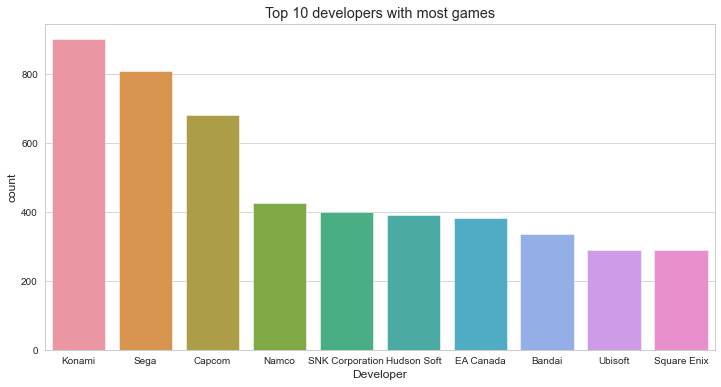

In [22]:
#Show top 10 developers with most games in countplot

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.countplot(data=df1,x='Developer',order=df1['Developer'].value_counts().iloc[:10].index)
ax.set_title('Top 10 developers with most games')

plt.show()

In [17]:
#Top 10 games with highest copies

df2 = df1[['Name','Developer','Total_Shipped']].sort_values(by=['Total_Shipped'],ascending=False).head(6)
df2

,Name,Developer,Total_Shipped
0,Wii Sports,Nintendo EAD,82.86
1,Super Mario Bros.,Nintendo EAD,40.24
2,Mario Kart Wii,Nintendo EAD,37.14
3,PlayerUnknown's Battlegrounds,PUBG Corporation,36.60
4,Wii Sports Resort,Nintendo EAD,33.09
5,Pokemon Red / Green / Blue Version,Game Freak,31.38


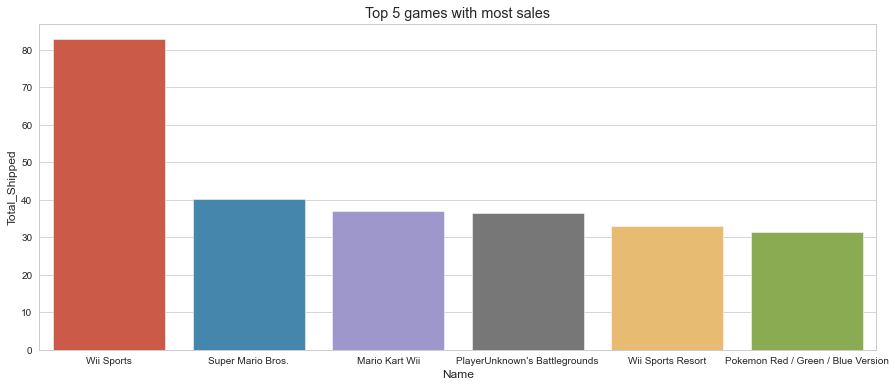

In [23]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')

x = sns.barplot(data=df2,x='Name',y='Total_Shipped')
x.set_title('Top 5 games with most sales')
plt.show()

In [100]:
df1.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Total_Sales
0,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006,NaN
1,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985,NaN
2,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008,NaN
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017,NaN
4,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009,NaN


In [120]:
#Recalculate Total_Sales and replace NaN values with Global_Sales
#Exculde rows with no Total_Sales

df1['Total_Sales'] = df1['NA_Sales']+ df1['EU_Sales'] + df1['JP_Sales'] + df['Other_Sales']

df1['Total_Sales'].fillna(df1['Global_Sales'],inplace=True)

df1.shape[0]
df1.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Total_Sales
0,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006,NaN
1,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985,NaN
2,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008,NaN
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017,NaN
4,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009,NaN


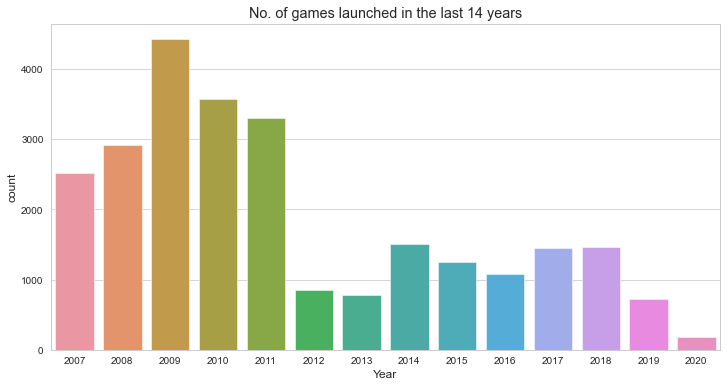

In [45]:
#No. of games launched in the last 14 years

plt.figure(figsize=(12,6))
a = sns.countplot(data=df1[df1['Year']>2006],x='Year')
a.set_title('No. of games launched in the last 14 years')

plt.show()

#it turns out that 2009 is the most prosperous year for gaming industry

In [97]:
#Top 10 devs with most games shipped

df1.groupby('Developer').sum()['Total_Shipped'].sort_values(ascending=False).head(10)

Developer
Nintendo EAD              668.81
Game Freak                242.77
Capcom                    105.90
Nintendo R&D1             105.32
Nintendo                   81.31
Polyphony Digital          75.46
Blizzard Entertainment     70.66
Rare Ltd.                  70.21
SquareSoft                 69.70
HAL Laboratory             64.54
Name: Total_Shipped, dtype: float64

In [151]:
#Top 10 devs with most sales in M USD

df6 = df1.groupby(by=['Developer']).sum()['Total_Sales'].sort_values(ascending=False).head(10).reset_index()
top10devs = df6['Developer']
top10devs

0            EA Canada
1           EA Tiburon
2     Ubisoft Montreal
3             Treyarch
4    Traveller's Tales
5               Konami
6        Infinity Ward
7       Rockstar North
8               Capcom
9      Visual Concepts
Name: Developer, dtype: object

In [166]:
#Top 10 devs with most game sales from 2007 onwards

year14 = df1[(df1['Year']>2006) & (df1['Developer'].isin(top10devs))]
year14 = year14[['Year','Developer','Total_Sales']]

#Unstack to rows and columns

year14_unstack = year14.groupby(by=['Developer','Year']).sum()['Total_Sales'].unstack()

year14_unstack

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Developer,,,,,,,,,,,,,,
Capcom,3.09,5.50,10.07,3.54,5.37,10.54,2.00,0.76,1.76,3.11,3.16,7.81,0.04,NaN
EA Canada,15.46,14.10,16.19,15.56,16.37,21.59,18.43,22.56,17.17,20.06,0.96,0.72,NaN,NaN
EA Tiburon,11.77,14.69,13.20,12.27,9.74,9.84,9.47,7.90,8.76,6.44,4.53,4.06,NaN,NaN
Infinity Ward,17.28,NaN,25.03,0.06,30.97,NaN,28.81,NaN,NaN,13.90,0.83,0.00,NaN,NaN
Konami,2.58,17.43,10.21,9.21,6.25,5.21,3.39,0.48,NaN,0.14,0.00,0.92,0.00,0.0
Rockstar North,NaN,21.80,2.63,2.17,NaN,NaN,36.20,28.11,0.00,NaN,NaN,NaN,NaN,0.0
Traveller's Tales,18.06,28.14,5.16,8.41,16.62,4.55,8.22,5.71,8.79,3.52,6.06,3.23,NaN,NaN
Treyarch,1.56,16.17,1.51,30.40,0.00,29.59,NaN,NaN,26.70,NaN,NaN,14.30,NaN,NaN
Ubisoft Montreal,15.51,17.53,14.59,11.42,12.37,20.24,13.73,26.88,7.36,3.97,9.19,1.79,NaN,NaN


Text(0.5, 1.0, "Top 10 developers' game sales from 2007 - 2020")

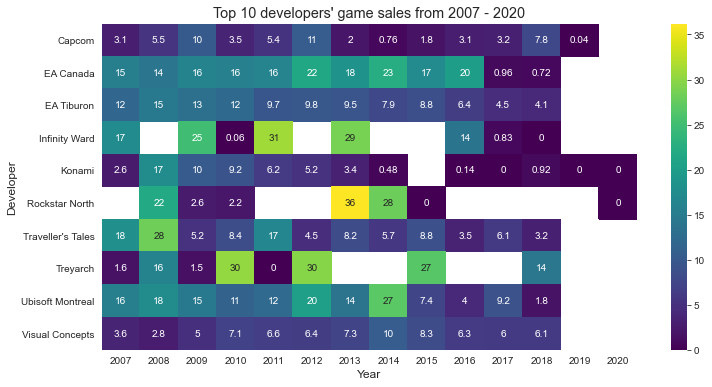

In [173]:
#Create heatmap for year14

plt.figure(figsize=(12,6))

y14 = sns.heatmap(data=year14_unstack,cmap='viridis',annot=True)
y14.set_title("Top 10 developers' game sales from 2007 - 2020")

In [122]:
#Find correlation of the data
#Select only useful columns and data with Global_Sales
#correlation is only working for numeric columns

df4 = df1[['Year','Critic_Score','User_Score','Total_Shipped','Total_Sales']]
df4.corr() #using pearson method by default

,Year,Critic_Score,User_Score,Total_Shipped,Total_Sales
Year,1.000000,0.013595,-0.116728,-0.162917,-0.030489
Critic_Score,0.013595,1.000000,0.582673,0.204216,0.296562
User_Score,-0.116728,0.582673,1.000000,-0.025732,0.241730
Total_Shipped,-0.162917,0.204216,-0.025732,1.000000,NaN
Total_Sales,-0.030489,0.296562,0.241730,NaN,1.000000


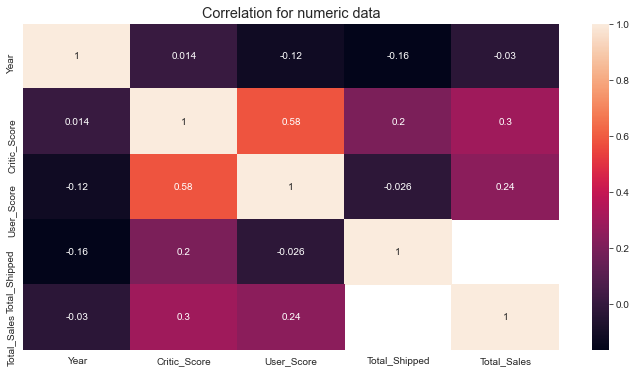

In [174]:
#Create heatmap for correlation

corr_matrix = df4.corr()

plt.figure(figsize=(12,6))
c = sns.heatmap(corr_matrix,annot=True)
c.set_title('Correlation for numeric data')

plt.show()

# Summary

It indicates that user socre and critic score are highly correlated.
<br>
Also, total sales (in M USD) is somewhat related to user score.

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50088 entries, 0 to 55790
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            50088 non-null  object 
 1   basename        50088 non-null  object 
 2   Genre           50088 non-null  object 
 3   ESRB_Rating     23406 non-null  object 
 4   Platform        50088 non-null  object 
 5   Publisher       50088 non-null  object 
 6   Developer       50074 non-null  object 
 7   VGChartz_Score  0 non-null      float64
 8   Critic_Score    6510 non-null   float64
 9   User_Score      328 non-null    float64
 10  Total_Shipped   1734 non-null   float64
 11  Global_Sales    18661 non-null  float64
 12  NA_Sales        12796 non-null  float64
 13  EU_Sales        12930 non-null  float64
 14  JP_Sales        6555 non-null   float64
 15  Other_Sales     15222 non-null  float64
 16  Year            50088 non-null  int64  
 17  Total_Sales     18661 non-null 

In [203]:
#Replace object datatype columns with category datatype and assign number to them

df_numerized = df1

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Total_Sales
0,Wii Sports,wii-sports,17,1,59,1561,4708,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006,NaN
1,Super Mario Bros.,super-mario-bros,10,-1,35,1561,4708,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985,NaN
2,Mario Kart Wii,mario-kart-wii,12,1,59,1561,4708,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008,NaN
3,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,15,-1,41,1650,4952,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017,NaN
4,Wii Sports Resort,wii-sports-resort,17,1,59,1561,4708,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009,NaN


My assumptions are:
<br>
1. Developer plays a big part to Total sales and Total shipped.
2. Genre is also correlated to Total sales and Total shipped.

In [204]:
#Find correlation between Developer and other columns

df5 = df_numerized[['Developer','Publisher','Platform','Genre','Year','Critic_Score','User_Score','Total_Shipped','Total_Sales']]
df5.corr()

,Developer,Publisher,Platform,Genre,Year,Critic_Score,User_Score,Total_Shipped,Total_Sales
Developer,1.000000,0.389112,0.031877,-0.021135,0.017921,0.018787,0.025855,0.024012,0.033323
Publisher,0.389112,1.000000,0.015651,-0.048844,0.014915,0.032345,0.057559,-0.050178,-0.016145
Platform,0.031877,0.015651,1.000000,0.040865,0.251699,0.056475,0.047476,-0.086973,0.097040
Genre,-0.021135,-0.048844,0.040865,1.000000,-0.056226,0.076284,-0.006599,0.049011,0.022650
Year,0.017921,0.014915,0.251699,-0.056226,1.000000,0.013595,-0.116728,-0.162917,-0.030489
Critic_Score,0.018787,0.032345,0.056475,0.076284,0.013595,1.000000,0.582673,0.204216,0.296562
User_Score,0.025855,0.057559,0.047476,-0.006599,-0.116728,0.582673,1.000000,-0.025732,0.241730
Total_Shipped,0.024012,-0.050178,-0.086973,0.049011,-0.162917,0.204216,-0.025732,1.000000,NaN
Total_Sales,0.033323,-0.016145,0.097040,0.022650,-0.030489,0.296562,0.241730,NaN,1.000000


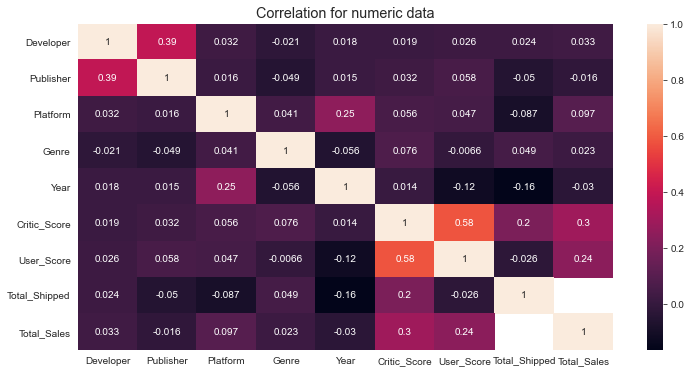

In [205]:
#Create heatmap for correlation

corr_matrix = df5.corr()

plt.figure(figsize=(12,6))
c1 = sns.heatmap(corr_matrix,annot=True)
c1.set_title('Correlation for numeric data')

plt.show()

# Summary

Both developer and genre of a game don't correlate to Total sales and Total shipped.
<br>
So, my initial assumptions are wrong.